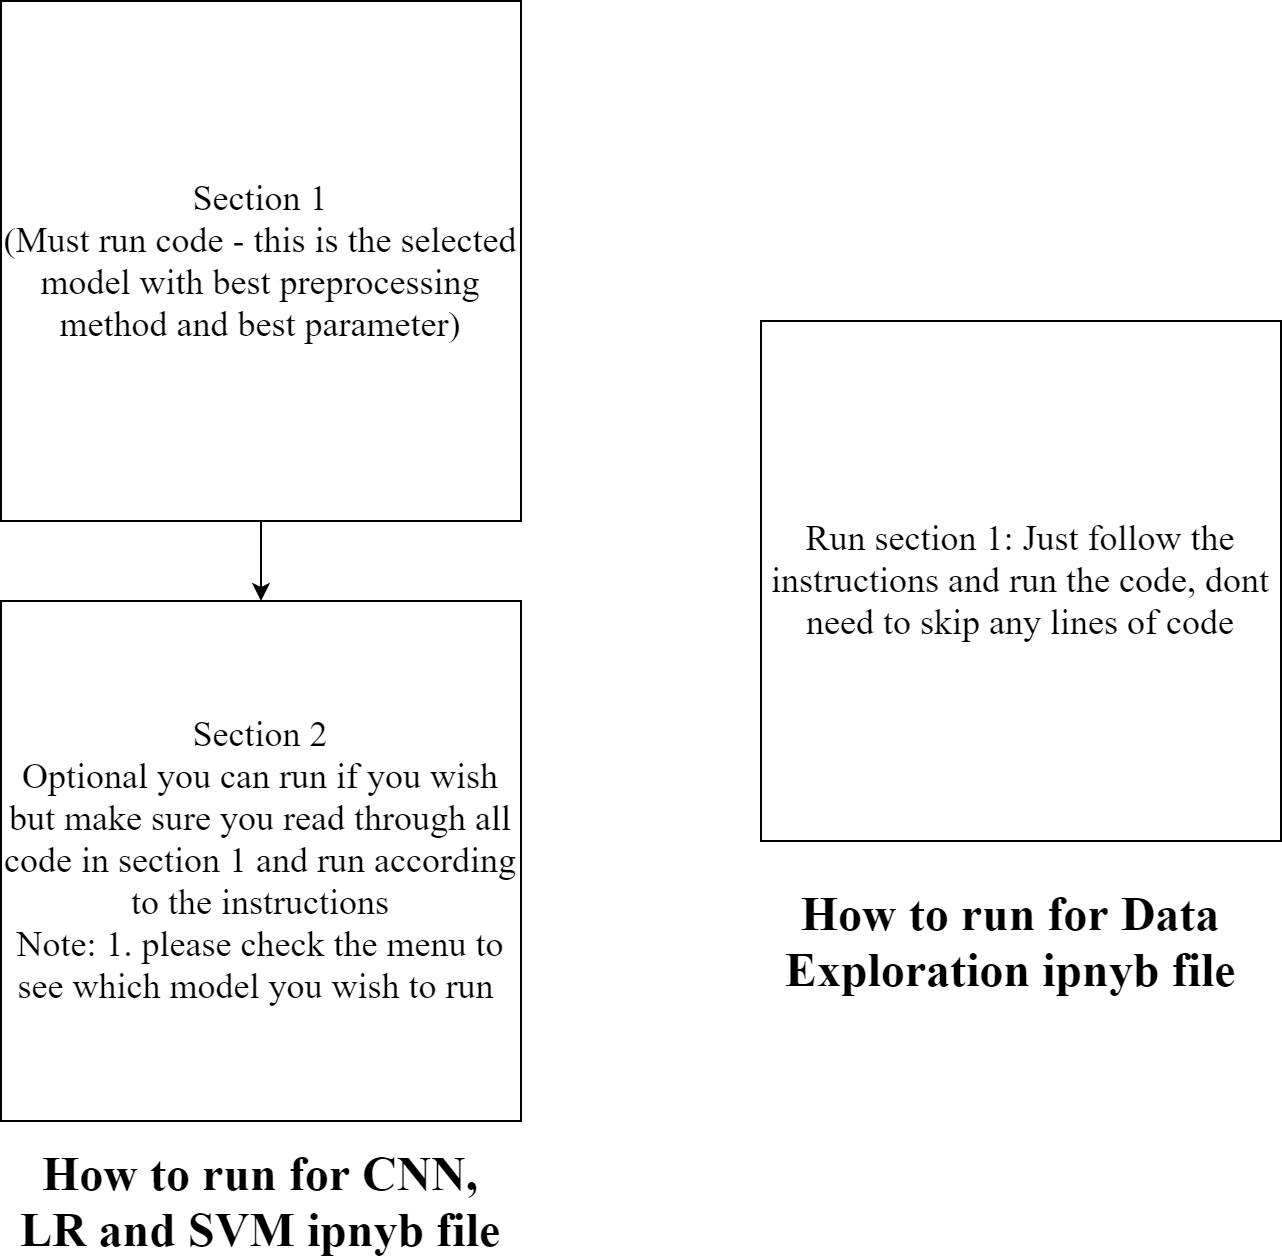

#DATA EXPLORATION

SECTION 1

just run the following code and stop at the part where you wish to stop

In [ ]:
#libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import glm
import keras

In [ ]:
# Download dataset of CIFAR-100 
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
#print shape of the dataset
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
 
# print number of data set samples
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')
 
# Data type for train and test set
print(type(x_test))
print(type(y_test[0]))



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


CIFAR-100 Labels


0: apple

1: aquarium_fish

2: baby

3: bear

4: beaver

5: bed

6: bee

7: beetle

8: bicycle

9: bottle

10: bowl

11: boy

12: bridge

13: bus

14: butterfly

15: camel

16: can

17: castle

18: caterpillar

19: cattle

20: chair

21: chimpanzee

22: clock

23: cloud

24: cockroach

25: couch

26: cra

27: crocodile

28: cup

29: dinosaur

30: dolphin

31: elephant

32: flatfish

33: forest

34: fox

35: girl

36: hamster

37: house

38: kangaroo

39: keyboard

40: lamp

41: lawn_mower

42: leopard

43: lion

44: lizard

45: lobster

46: man

47: maple_tree

48: motorcycle

49: mountain

50: mouse

51: mushroom

52: oak_tree

53: orange

54: orchid

55: otter

56: palm_tree

57: pear

58: pickup_truck

59: pine_tree

60: plain

61: plate

62: poppy

63: porcupine

64: possum

65: rabbit

66: raccoon

67: ray

68: road

69: rocket

70: rose

71: sea

72: seal

73: shark

74: shrew

75: skunk

76: skyscraper

77: snail

78: snake

79: spider

80: squirrel

81: streetcar

82: sunflower

83: sweet_pepper

84: table

85: tank

86: telephone

87: television

88: tiger

89: tractor

90: train

91: trout

92: tulip

93: turtle

94: wardrobe

95: whale

96: willow_tree

97: wolf

98: woman

99: worm

visualise some images

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


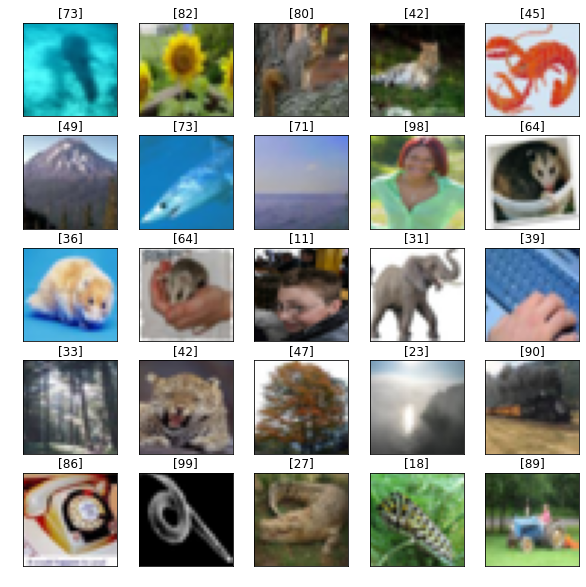

In [ ]:
# Show sample random image 5x5
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,100)
    cifar_image=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    # Erase the value of x tick and y tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # remove the tick x-axis and y-axis
    plt.tick_params(length=0)
    # print label
    plt.title(y_train[rand_num])
 
plt.show()

In [ ]:
%%time
#flipping image

#preprocess dataset
Datagenerator = ImageDataGenerator()

x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image

#add back to original input image
x_train = np.concatenate((x_train,x_train1))
x_test = np.concatenate((x_test,x_test1))
#append the label twice because the fiiped images is the same images just being flipped, it has the same index
y_train = np.concatenate((y_train,y_train))
y_test = np.concatenate((y_test,y_test))


Wall time: 460 ms


In [ ]:
%%time
# Normalize taining and test set image to the range of 0-1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
 
# convert the labels of y_train,y_test to One-Hot encoding
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
 

Wall time: 3.76 s


In [ ]:
#split train into train and validation and keep test dataset as it is
x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
                                                    train_size=0.70, 
                                                    random_state=42,
                                                    stratify=y_train)

we learned how to construct the following code from https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290

In [ ]:
#create another set of train, valid and test to get the get the label that are not in one hot encoding, this is useful for later section

(x_train100,y_train100),(x_test100,y_test100) = cifar100.load_data()


y_train100 = np.concatenate((y_train100,y_train100))
x_train100 = np.concatenate((x_train100,x_train100))
x_test100 = np.concatenate((x_test100,x_test100))
y_test100 = np.concatenate((y_test100,y_test100))

from sklearn.model_selection import train_test_split
x_train100, x_valid100, y_train100 , y_valid100 = train_test_split(x_train100, y_train100, 
                                                    train_size=0.70, 
                                                    random_state=42,
                                                    stratify=y_train100)

running Box-Tidwell Test to test linearity assumption

In [ ]:

# Add constant term
xt = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
X_lt = sm.add_constant(xt, prepend=False)
  
# Building model and fit the data (using statsmodel's Logit)
logit_results = sm.GLM(y_train100, X_lt, family=sm.families.Poisson()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                70000
Model:                            GLM   Df Residuals:                    66927
Model Family:                 Poisson   Df Model:                         3072
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.4078e+05
Date:                Wed, 27 Oct 2021   Deviance:                   1.3022e+06
Time:                        12:13:29   Pearson chi2:                 1.13e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2702      0.050     -5.442      0.0

Code learned from website: https://towardsdatascience.com/how-to-create-fast-and-accurate-scatter-plots-with-lots-of-data-in-python-a1d3f578e551

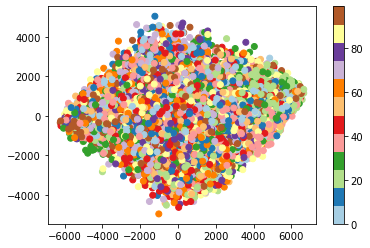

In [ ]:
#plot scatter plot input data map with output labels
(x_train1, y_train1), (x_test1, y_test1) = keras.datasets.cifar100.load_data()
assert x_train1.shape == (50000, 32, 32, 3)
assert x_test1.shape == (10000, 32, 32, 3)
assert y_train1.shape == (50000, 1)
assert y_test1.shape == (10000, 1)

plt.figure()
train = x_train1.reshape(x_train1.shape[0],x_train1.shape[1]*x_train1.shape[2]*x_train1.shape[3])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(train)
plt.scatter(proj[:, 0], proj[:, 1], c=y_train1, cmap="Paired")
plt.colorbar()